Name: Muley, Tushar

Assignment: Week 9 & 10 Exercises

Date: February 21, 2021

# Exercise 1 Activity 9 :  

1. Import the necessary libraries.

In [18]:
#Import libraries need for this Activity
import requests
import re
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import ssl

2. Check the SSL certificate.

In [7]:
#Check SSL certificate
cert = ssl.create_default_context()
cert.check_hostname = False
cert.verify_mode = ssl.CERT_NONE

3. Read the HTML from the URL:

In [2]:
#Read the HTML
url = 'https://www.gutenberg.org/browse/scores/top'

response = requests.get(url)
#Confirm type of response
type(response)

requests.models.Response

4. Write a small function to check the status of the web request.

In [3]:
#Function to check status of web request
def check_web_page(r):
    if r.status_code==200: #200 response was error free status
        print('Good to go.')
    else: #Anything else connection status failed or error related to request
        print('Crash and burn!')

In [8]:
#Check the status of the web page
check_web_page(response)

Good to go.


5. Decode the response and pass this on to BeautifulSoup for HTML parsing.

In [9]:
#Decode the response and pass to bs4
content = response.content.decode(response.encoding)
#Parsing data to pass to variable
soup = BeautifulSoup(content, 'html.parser')
#Print content
content

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n <meta charset="UTF-8"/>\n\n<title>Top 100 | Project Gutenberg</title>\n <link rel="stylesheet" href="/gutenberg/style.css?v=1.1">\n <link rel="stylesheet" href="/gutenberg/collapsible.css?1.1">\n <link rel="stylesheet" href="/gutenberg/new_nav.css?v=1.321231">\n<link rel="stylesheet" href="/gutenberg/pg-desktop-one.css">\n <meta name="viewport" content="width=device-width, initial-scale=1">\n <meta name="keywords" content="books, ebooks, free, kindle, android, iphone, ipad"/>\n <meta name="google-site-verification" content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io"/>\n <meta name="alexaVerifyID" content="4WNaCljsE-A82vP_ih2H_UqXZvM"/>\n <link rel="copyright" href="https://www.gnu.org/copyleft/fdl.html"/>\n <link rel="shortcut icon" href="/gutenberg/favicon.ico?v=1.1"/>\n\n <meta property="og:title"        content="Project Gutenberg" />\n <meta property="og:type"         content="website" />\n <meta property="

6. Find all the href tags and store them in the list of links. Check what the list looks like – print the first 30 elements.

In [13]:
# Find all the href tags and store them in the list of links

#List for tags
lst_tags=[]

#Loop through to find all 'href'
for tags in soup.find_all('a'):
    lst_tags.append(tags.get('href')) #Add anything with href to lst_tags    

In [14]:
#Print the top 30
lst_tags[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [15]:
#Full print of tags
lst_tags

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7',
 '#authors-last7',
 '#books-last30',
 '#authors-last30',
 '/ebooks/1342',
 '/ebooks/84',
 '/ebooks/11',
 '/ebooks/1661',
 '/ebooks/2701',
 '/ebooks/98',
 '/ebooks/64596',
 '/ebooks/1080',
 '/ebooks/5200',
 '/ebooks/174',
 '/ebooks/1260',
 '/ebooks/1952',
 '/ebooks/844',
 '/ebooks/76',
 '/ebooks/64595',
 '/ebooks/25344',
 '/ebooks/57775',
 '/eboo

7. Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.

8. Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.

In [16]:
#Empty list
lst_book_num = []

In [19]:
#Loop to find all the numbers and append to lst_book_num
for i in range(33,133): #Counted the point at which ebooks start added a 100 to get range end
    tags=lst_tags[i] 
    tags=tags.strip() #Remove all white space
    n=re.findall('[0-9]+',tags) #Find all numbers using regex express
    if len(n)==1:
        lst_book_num.append(int(n[0])) #Append number to list

In [20]:
#COnfirm append worked
print(lst_book_num)

[1342, 84, 11, 1661, 2701, 98, 64596, 1080, 5200, 174, 1260, 1952, 844, 76, 64595, 25344, 57775, 46, 1497, 64317, 219, 345, 43, 2542, 1232, 160, 4300, 408, 6133, 74, 16, 64592, 2591, 2600, 1400, 16328, 1184, 55, 514, 2852, 3207, 205, 996, 42108, 135, 158, 58585, 36, 1250, 120, 768, 1998, 23, 5740, 45, 6130, 43453, 2814, 2554, 244, 64594, 19942, 829, 25929, 215, 203, 3600, 766, 1001, 1727, 902, 863, 64599, 30254, 32415, 27559, 7370, 3825, 105, 140, 730, 209, 113, 35, 20203, 972, 27509, 4363, 236, 3090, 8800, 147, 3296, 600, 2500, 15399, 521, 2680, 1399, 27827]


9. What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

In [21]:
#Print the first 2000 characters
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2021-02-20178820
last 7 days1394510
last 30 days5788321



Top 100 EBooks yesterd

10.Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

11.Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.

12. Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.

In [22]:
#Index the top 100 Ebooks from yesterday
lst_temp=[] #My temp list
idx=soup.text.splitlines().index('Top 100 EBooks yesterday')
for i in range(108):
    lst_temp.append(soup.text.splitlines()[idx+2+i])


13.Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.

In [23]:
#Get titles and append them to list
lst_titles=[] #Empty list
for i in range(7,108): #Contain the range to between 7 and 108 for titles only
    id1,id2=re.match('^[a-zA-Z ]*',lst_temp[i]).span() #Regex expression to find titles
    lst_titles.append(lst_temp[i][id1:id2]) #Add titles to list

In [26]:
#View the list
lst_titles

['',
 'Pride and Prejudice by Jane Austen ',
 'Frankenstein',
 'Alice',
 'The Adventures of Sherlock Holmes by Arthur Conan Doyle ',
 'Moby Dick',
 'A Tale of Two Cities by Charles Dickens ',
 'The Star Beast by Damon Knight ',
 'A Modest Proposal by Jonathan Swift ',
 'Metamorphosis by Franz Kafka ',
 'The Picture of Dorian Gray by Oscar Wilde ',
 'Jane Eyre',
 'The Yellow Wallpaper by Charlotte Perkins Gilman ',
 'The Importance of Being Earnest',
 'Adventures of Huckleberry Finn by Mark Twain ',
 'Animat by Basil Wells ',
 'The Scarlet Letter by Nathaniel Hawthorne ',
 'Le jardin des supplices by Octave Mirbeau ',
 'A Christmas Carol in Prose',
 'The Republic by Plato ',
 'The Great Gatsby by F',
 'Heart of Darkness by Joseph Conrad ',
 'Dracula by Bram Stoker ',
 'The Strange Case of Dr',
 'Et dukkehjem',
 'Il Principe',
 'The Awakening',
 'Ulysses by James Joyce ',
 'The Souls of Black Folk by W',
 'Ars',
 'The Adventures of Tom Sawyer',
 'Peter Pan by J',
 'Harper',
 'Grimms',
 '

In [27]:
#Print the list to double check
for l in lst_titles: #Loop to go through list for printing
    print(l)


Pride and Prejudice by Jane Austen 
Frankenstein
Alice
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Moby Dick
A Tale of Two Cities by Charles Dickens 
The Star Beast by Damon Knight 
A Modest Proposal by Jonathan Swift 
Metamorphosis by Franz Kafka 
The Picture of Dorian Gray by Oscar Wilde 
Jane Eyre
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Importance of Being Earnest
Adventures of Huckleberry Finn by Mark Twain 
Animat by Basil Wells 
The Scarlet Letter by Nathaniel Hawthorne 
Le jardin des supplices by Octave Mirbeau 
A Christmas Carol in Prose
The Republic by Plato 
The Great Gatsby by F
Heart of Darkness by Joseph Conrad 
Dracula by Bram Stoker 
The Strange Case of Dr
Et dukkehjem
Il Principe
The Awakening
Ulysses by James Joyce 
The Souls of Black Folk by W
Ars
The Adventures of Tom Sawyer
Peter Pan by J
Harper
Grimms
War and Peace by graf Leo Tolstoy 
Great Expectations by Charles Dickens 
Beowulf
The Count of Monte Cristo
The Wonderful Wizard of Oz by 

# Exercise 2 Activity 10 :  

1. Load libraries

In [28]:
#Import Libraries
import urllib.request as request, urllib.parse, urllib.error
import json

2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

3. Obtain a key and store it in JSON as APIkeys.json. - Done

4. Open the APIkeys.json file.

In [29]:
#Open the API key file
api_file = open('APIkeys.json',)
keys = json.load(api_file)
api_file.close()

In [30]:
#Print API key from keys
keys

{'OMDBapi': '7532548a'}

5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.

In [31]:
#Assign url to variable
base_url = 'http://www.omdbapi.com/?'

6. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

In [32]:
#Variable with API key
apikey = 'apikey=7532548a'

In [33]:
#Use the url to call the API and close it with a 'with' statement

with request.urlopen(base_url+apikey+'&t=titanic') as response:
    source = response.read()
    data = json.loads(source)

#Print the data returned
data

{'Title': 'Titanic',
 'Year': '1997',
 'Rated': 'PG-13',
 'Released': '19 Dec 1997',
 'Runtime': '194 min',
 'Genre': 'Drama, Romance',
 'Director': 'James Cameron',
 'Writer': 'James Cameron',
 'Actors': 'Leonardo DiCaprio, Kate Winslet, Billy Zane, Kathy Bates',
 'Plot': 'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
 'Language': 'English, Swedish, Italian, French',
 'Country': 'USA, Mexico',
 'Awards': 'Won 11 Oscars. Another 112 wins & 83 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.8/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '89%'},
  {'Source': 'Metacritic', 'Value': '75/100'}],
 'Metascore': '75',
 'imdbRating': '7.8',
 'imdbVotes': '1,048,704',
 'imdbID': 'tt0120338',
 'Type': 'movie',
 'DVD': 'N/A',
 'BoxOffice': '$659,3

In [39]:
#Double checking the call with a different movie
with request.urlopen(base_url+apikey+'&t=Avengers') as response:
    source = response.read()
    data = json.loads(source)

#Print the data returned
data


{'Title': 'The Avengers',
 'Year': '2012',
 'Rated': 'PG-13',
 'Released': '04 May 2012',
 'Runtime': '143 min',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Director': 'Joss Whedon',
 'Writer': 'Joss Whedon (screenplay), Zak Penn (story), Joss Whedon (story)',
 'Actors': 'Robert Downey Jr., Chris Evans, Mark Ruffalo, Chris Hemsworth',
 'Plot': "Earth's mightiest heroes must come together and learn to fight as a team if they are going to stop the mischievous Loki and his alien army from enslaving humanity.",
 'Language': 'English, Russian, Hindi',
 'Country': 'USA',
 'Awards': 'Nominated for 1 Oscar. Another 38 wins & 79 nominations.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BNDYxNjQyMjAtNTdiOS00NGYwLWFmNTAtNThmYjU5ZGI2YTI1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '91%'},
  {'Source': 'Metacritic', 'Value': '69/100'}],
 'Metascore': '69',
 'imdbRating': '8.0',
 'imd

7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

In [40]:
#Function to print the json data
def print_json(data):
    lst_movie_data=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer','Actors', 'Plot',
               'Language', 'Country', 'Awards', 'Poster','Ratings','Metascore', 'imdbRating', 'imdbVotes', 'imdbID',
              'Type','DVD','BoxOffice','Production','Website','Response'] #List to hold printable data.
    for d in lst_movie_data: #Found in list
        if d in list(data.keys()): #Condition if in list print it
            print(f'{d}: {data[d]}') #Print matches

8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.

In [41]:
#Import os library
import os
from IPython.display import Image, display #Display the image that has been pulled down to local

In [45]:
#Downloading the poster to local
def my_poster(data):
    title = data['Title']
    poster_url = data['Poster']
    poster_file_extension=poster_url.split('.')[-1] #Split the poster url
    movie_poster = urllib.request.urlopen(poster_url).read() #Reads image from web
    loc=os.getcwd()+'\\'+'Posters'+'\\' #Add poster name
    if not os.path.isdir(loc): #Check if director is present
        os.mkdir(loc) #Creates new directory if needed
    filename=loc+str(title)+'.'+poster_file_extension #File location of poster
    file=open(filename,'wb') #Open the file
    file.write(movie_poster) #Write the file
    file.close() #Close the file
    display(Image(filename=filename)) #Display the file in Notebooks

9. Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.

In [43]:
#Function to look for the movie
def search_movie(movie):
    try: #Try block
        url_now = base_url+apikey+'&'+urllib.parse.urlencode({'t':(movie)}) #URL to find movie
        print(f'Hold on I am getting you '+movie+ ' now...\n') #Let user know we are looking
        print(url_now) #Print the full url
        with request.urlopen(url_now) as response: #Call the API
            source = response.read() #Read the information
            data = json.loads(source) #Load it to data
        if data['Response']=='True': #Reponse is true
            print_json(data) #Call print_json function
            if data['Poster']!='N/A': #If poster is not N/A call the poster function
                my_poster(data) #Call my_poster function
            else:
                print('Error encountered: ',data['Error']) #Report error
        else:
            print('Error encountered:',data ['Error']) #If response is not true print error
    except urllib.error.URLError as e: #End the Try block
        print(f'ERROR: {e.reason}') #Print the error for the try block
        

10. Test the search_movie function by entering Titanic.

What movie do you want a poster for? Space Sweepers
Hold on I am getting you Space Sweepers now...

http://www.omdbapi.com/?apikey=7532548a&t=Space+Sweepers
Title: Space Sweepers
Year: 2021
Rated: TV-MA
Released: 05 Feb 2021
Runtime: 136 min
Genre: Action, Adventure, Drama, Fantasy, Sci-Fi
Director: Sung-hee Jo
Writer: N/A
Actors: Song Joong-Ki, Kim Tae-ri, Seon-kyu Jin, Hae-Jin Yoo
Plot: Set in the year 2092 and follows the crew of a space junk collector ship called The Victory. When they discover a humanoid robot named Dorothy that's known to be a weapon of mass destruction, they get involved in a risky business deal.
Language: Korean, English
Country: South Korea
Awards: N/A
Poster: https://m.media-amazon.com/images/M/MV5BZTUxN2M3ZWYtMzc1MC00NTc4LWFhZDItMzViZDg2NmFjMzBhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '6.6/10'}]
Metascore: N/A
imdbRating: 6.6
imdbVotes: 6,602
imdbID: tt12838766
Type: movie
DVD: N/A
BoxOffice: N/A
Pro

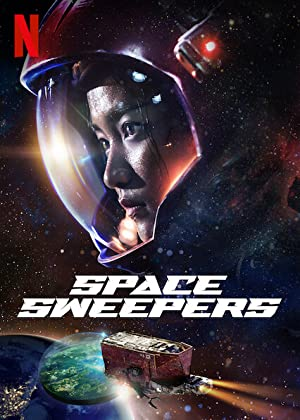

In [46]:
#Ask the user for input

movie = input('What movie do you want a poster for? ')
search_movie(movie) #Call function to find the movie

#search_movie('Space Sweepers') #For testing



What movie do you want a poster for? Gone in 60 seconds
Hold on I am getting you Gone in 60 seconds now...

http://www.omdbapi.com/?apikey=7532548a&t=Gone+in+60+seconds
Title: Gone in 60 Seconds
Year: 2000
Rated: PG-13
Released: 09 Jun 2000
Runtime: 118 min
Genre: Action, Crime, Thriller
Director: Dominic Sena
Writer: H.B. Halicki, Scott Rosenberg (screenplay)
Actors: Nicolas Cage, Giovanni Ribisi, Angelina Jolie, T.J. Cross
Plot: A retired master car thief must come back to the industry and steal fifty cars with his crew in one night to save his brother's life.
Language: English
Country: USA
Awards: 9 wins & 6 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BMTIwMzExNDEwN15BMl5BanBnXkFtZTYwODMxMzg2._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '6.5/10'}, {'Source': 'Rotten Tomatoes', 'Value': '26%'}, {'Source': 'Metacritic', 'Value': '35/100'}]
Metascore: 35
imdbRating: 6.5
imdbVotes: 260,789
imdbID: tt0187078
Type: movie
DVD: N/A
BoxOffice: $101,6

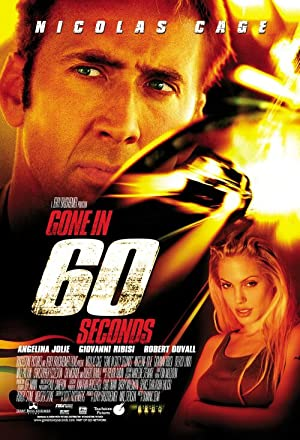

In [47]:
#Try is again
movie = input('What movie do you want a poster for? ')
search_movie(movie)

In [51]:
#One more time
movie = input('What movie do you want a poster for? ')
search_movie(movie)

What movie do you want a poster for? 2Fast2Furious
Hold on I am getting you 2Fast2Furious now...

http://www.omdbapi.com/?apikey=7532548a&t=2Fast2Furious
Error encountered: Movie not found!


What movie do you want a poster for? 2 Fast 2 Furious
Hold on I am getting you 2 Fast 2 Furious now...

http://www.omdbapi.com/?apikey=7532548a&t=2+Fast+2+Furious
Title: 2 Fast 2 Furious
Year: 2003
Rated: PG-13
Released: 06 Jun 2003
Runtime: 107 min
Genre: Action, Crime, Thriller
Director: John Singleton
Writer: Gary Scott Thompson (characters), Michael Brandt (story), Derek Haas (story), Gary Scott Thompson (story), Michael Brandt (screenplay), Derek Haas (screenplay)
Actors: Paul Walker, Tyrese Gibson, Eva Mendes, Cole Hauser
Plot: Former cop Brian O'Conner is called upon to bust a dangerous criminal and he recruits the help of a former childhood friend and street racer who has a chance to redeem himself.
Language: English, Spanish
Country: USA, Germany
Awards: 4 wins & 13 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BMzExYjcyYWMtY2JkOC00NDUwLTg2OTgtMDI3MGY2OWQzMDE2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '5.9/

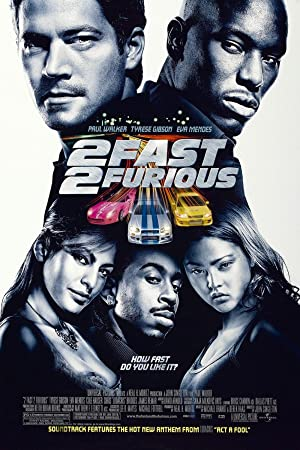

In [53]:
#The right way
movie = input('What movie do you want a poster for? ')
search_movie(movie)

11. Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).


In [54]:
#movie = input('What movie do you want a poster for? ')
search_movie('Random_error')

Hold on I am getting you Random_error now...

http://www.omdbapi.com/?apikey=7532548a&t=Random_error
Error encountered: Movie not found!


# Exercise 3: Connect to Twitter API and do a simple data pull:

In [1]:
#Import Twitter Library
import twitter

In [4]:
#Load my keys
api = twitter.Api(consumer_key= 'Z73l5WzyFFZtCCrTOLC',
                  consumer_secret='yOjtfbsEQPL4MKqVRAKx6chnflJLbdgm9hhd9iwe',
                  access_token_key='1361357611497447425-d2xanlXEmRZIe6',
                  access_token_secret='6duIm4zB8V1xOHv04268qamE9bgwwRzEoi') 
#Keys have been alter due to seurity and will not work

In [5]:
#Verify Credentials

print(api.VerifyCredentials())

{"created_at": "Mon Feb 15 16:53:23 +0000 2021", "default_profile": true, "default_profile_image": true, "description": "Just a squirrel trying to get my nut in the world.", "friends_count": 8, "id": 1361357611497447425, "id_str": "1361357611497447425", "name": "Tushar M", "profile_background_color": "F5F8FA", "profile_image_url": "http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_image_url_https": "https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "TusharM75238677"}


In [6]:
#Get friends I am following
users = api.GetFriends() #Set variable users
print([u.name for u in users])

['John Cena', 'A Late Show', 'Mark Ruffalo', 'Arizona State Sun Devils', 'Stephen Colbert', 'Neil deGrasse Tyson', 'jimmy fallon', 'Jimmy Kimmel']


In [8]:
#Get searches for Bellevue University

api.GetSearch(term='Bellevue University', since=2019-1-1, count=25)

[Status(ID=1361898030790823936, ScreenName=MarkMachacek5, Created=Wed Feb 17 04:39:28 +0000 2021, Text='RT @BUBruins: To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal by the Bellevue Un…'),
 Status(ID=1361833927451754496, ScreenName=Cheyenneisback_, Created=Wed Feb 17 00:24:44 +0000 2021, Text='RT @BUBruins: To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal by the Bellevue Un…'),
 Status(ID=1361813727591415810, ScreenName=thinmanx11, Created=Tue Feb 16 23:04:28 +0000 2021, Text='RT @BUBruins: To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal by the Bellevue Un…'),
 Status(ID=1361791841541238785, ScreenName=BillMullinsSID, Created=Tue Feb 16 21:37:30 +0000 2021, Text='RT @BUBruins: To all those in Bruin Nation:\n\nCheck out https://t.co/x3PK3xaoHh tomorrow at 8 a.m. for an exciting reveal by the Bellevue Un…'),


In [9]:
#Get searches for Data Science

api.GetSearch(term='Data Science', since=2020-3-1, count=25)

[Status(ID=1362171058162401283, ScreenName=SenatorRomney, Created=Wed Feb 17 22:44:22 +0000 2021, Text='The data is in: schools are not superspreaders. Science, not the teachers unions, should guide the timetable for op… https://t.co/frvSOPHk56'),
 Status(ID=1361958808117985280, ScreenName=RealSpikeCohen, Created=Wed Feb 17 08:40:58 +0000 2021, Text='Remember when we were called "anti-science" and accused of wanting people to die when we simply acknowledged the da… https://t.co/GWvUV4D4nH'),
 Status(ID=1361687028182745102, ScreenName=mattdizwhitlock, Created=Tue Feb 16 14:41:01 +0000 2021, Text='Not only is the White House lying, but members of the media who know better -- and have the data and the science in… https://t.co/eKTzw6bLZi'),
 Status(ID=1362255767890493444, ScreenName=ConnieMckenney, Created=Thu Feb 18 04:20:59 +0000 2021, Text='RT @smartblonde0670: @TG22110 Texas Gov &amp; DOE Sec. R. Perry were both provided data from the Wind Energy Technologies Program (WETO) SMEs a…'),


In [10]:
#Get searches for my stuff

api.GetSearch(term='Speeding', since=2020-3-1, count=25)

[Status(ID=1362148122504298497, ScreenName=itrevormoore, Created=Wed Feb 17 21:13:14 +0000 2021, Text="We mock the dead because it's provides an illusion of separation between them and ourselves. We don't have to confr… https://t.co/5tAXXC4hAN"),
 Status(ID=1361730444484558851, ScreenName=AEWGames, Created=Tue Feb 16 17:33:32 +0000 2021, Text="You see @abadon_AEW speeding at you on a Ghost. What's your next move? #AEWgames https://t.co/yvY1bBMZ2J"),
 Status(ID=1361925746793451523, ScreenName=TeluguBulletin, Created=Wed Feb 17 06:29:36 +0000 2021, Text='పంచాయితీ పోరులో జనసేన ‘మూడో లెక్క’ ఎంత.?\n\n🔸పంచాయితీ ఎన్నికల తొలి దశలో  జనసేన పార్టీ 18 శాతం ఓటు బ్యాంకుని కైవసం చే… https://t.co/PBIIS96Pph'),
 Status(ID=1362256221445623808, ScreenName=Mr___Carter99, Created=Thu Feb 18 04:22:47 +0000 2021, Text='RT @CdotHoncho: Police Aint Box Me In Wen Dey Stopped Me, Yea Dey Tweaked Im Speeding OFF 💨💨 https://t.co/ssWaCIVNWm'),
 Status(ID=1362256098024181761, ScreenName=NebPharmer, Created=Thu Feb 1

In [11]:
#Get searches Speeding Tickets and save to dataframe.

df_twitter_speeding_ticket = api.GetSearch(term='Speeding Ticket', since=2020-4-1, count=25)

In [12]:
#Print the df
df_twitter_speeding_ticket

[Status(ID=1362256028268720129, ScreenName=OedipaB, Created=Thu Feb 18 04:22:01 +0000 2021, Text='I went to the store to buy a box of tissue to cry into. Instead, I was pulled over and got a ticket for speeding.'),
 Status(ID=1362255300531810311, ScreenName=Scrocdiddlydog, Created=Thu Feb 18 04:19:07 +0000 2021, Text="@BadLegalTakes Had a buddy who got stopped for speeding in Nevada (He wasn't. Cruise control was set to sl) &amp; cops… https://t.co/AnXtNAh0c7"),
 Status(ID=1362254858213064706, ScreenName=JRobSATB, Created=Thu Feb 18 04:17:22 +0000 2021, Text='@TheDrunkenMick Forgot to pay a speeding ticket. 🤷🏻\u200d♂️'),
 Status(ID=1362252363692716033, ScreenName=Bazooka_Goblin, Created=Thu Feb 18 04:07:27 +0000 2021, Text='If someone can get thousands for putting gorilla glue in their hair can I set up a patreon to pay for my speeding ticket?'),
 Status(ID=1362252280171360256, ScreenName=isleytorr, Created=Thu Feb 18 04:07:07 +0000 2021, Text='It was only a matter of time that I got a

# Exercise 4: Choose 3 of the following visualizations to complete.


In [126]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
#Load candy file with dates
loc2 = 'BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.xlsx' 
#Read and load file into dataframe
df_boing=pd.read_excel(loc2, index_col=None, header=0)

In [153]:
#Preview df_boing
df_boing.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines,NaN
1,2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
2,2016-10-24 05:13:06.734,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Science: Latest News and Headlines,NaN
3,2016-10-24 05:14:17.192,No,Male,57,usa,il,JOY,MEH,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,South to North,Science: Latest News and Headlines,NaN
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,ESPN,NaN


In [154]:
#Reduce the size by removing some columns to perform Pivot
df_sm_boing= df_boing.drop(df_boing.iloc[:, 5:123], axis = 1) 

In [155]:
#Check the df
df_sm_boing.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?
0,2016-10-24 05:09:23.033,No,Male,22,Canada
1,2016-10-24 05:09:54.798,No,Male,45,usa
2,2016-10-24 05:13:06.734,No,Female,48,US
3,2016-10-24 05:14:17.192,No,Male,57,usa
4,2016-10-24 05:14:24.625,Yes,Male,42,USA


In [156]:
#Print out the columns for df small
df_sm_boing.columns

Index(['Timestamp', 'Are you going actually going trick or treating yourself?',
       'Your gender:', 'How old are you?', 'Which country do you live in?'],
      dtype='object')

In [157]:
#Rename the columns
df_sm_boing.columns = ['timestamp','trick_treating','gender','age','country']

In [158]:
#Check the df
df_sm_boing.head()

,timestamp,trick_treating,gender,age,country
0,2016-10-24 05:09:23.033,No,Male,22,Canada
1,2016-10-24 05:09:54.798,No,Male,45,usa
2,2016-10-24 05:13:06.734,No,Female,48,US
3,2016-10-24 05:14:17.192,No,Male,57,usa
4,2016-10-24 05:14:24.625,Yes,Male,42,USA


In [159]:
#Do a few data clean up items
df_sm_boing['country']=df_sm_boing['country'].str.replace(" ","")
df_sm_boing.dropna(inplace=True)
df_sm_boing['country']=df_sm_boing['country'].str.lower()
df_sm_boing['gender']=df_sm_boing['gender'].str.lower()
df_sm_boing=df_sm_boing.replace(['us','u','america','unitedstateofamerica','unitedstates','usa!','usa! usa!',
                                  'usa! usa! usa!','usa!!!!!!','ussa','usausausa','usausausausa','unitedstate',
                                   'u.s.','u.s.a.','merica','murica', 'usa'])

C:\Users\Tushar\anaconda3\lib\site-packages\pandas\core\missing.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x
C:\Users\Tushar\anaconda3\lib\site-packages\pandas\core\missing.py:58: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


In [160]:
#Do some more clean up
df_sm_boing=df_sm_boing.replace(['Old enough','Many','?','no','45-55','hahahahaha','older than dirt','5u','Enough',
                          'See question 2','24-50','Over 50','46 Halloweens.','ancient','OLD','old','MY NAME JEFF',
                           'sixty-nine','59 on the day after Halloween','old enough','your mom',
                          'I can remember when Java was a cool new language','60+','Old enough to know better ',
                                  'As old as my tongue a few years older than my teeth','50s','0x2A',
                                  'Fifty.  Nine.  Ish.','Ancient','I remember the Nixon administration',
                                  'over retirement age','50+','55+','over 40','Hahahahahaha', 
                                   'Old','Older than i act','really old','blah','older than I want to be',
                                  'Not as old as you...','Never ask a woman that question.','old ',
                                  'Same as yo mama','Too old to trick or treat without it being creepy',
                                  'Old enough to not Trick or Treat.','49 11/12ths'], np.nan)

#Drop the nan's
df_sm_boing.dropna(inplace=True)

In [161]:
#Check the data types
df_sm_boing.dtypes

timestamp         datetime64[ns]
trick_treating            object
gender                    object
age                      float64
country                   object
dtype: object

In [162]:
#Change age from float to integer data type
df_sm_boing['age']=df_sm_boing['age'].astype(int)


In [163]:
#Confirm changes took
df_sm_boing.head()

,timestamp,trick_treating,gender,age,country
0,2016-10-24 05:09:23.033,No,male,22,canada
1,2016-10-24 05:09:54.798,No,male,45,canada
2,2016-10-24 05:13:06.734,No,female,48,canada
3,2016-10-24 05:14:17.192,No,male,57,canada
4,2016-10-24 05:14:24.625,Yes,male,42,canada


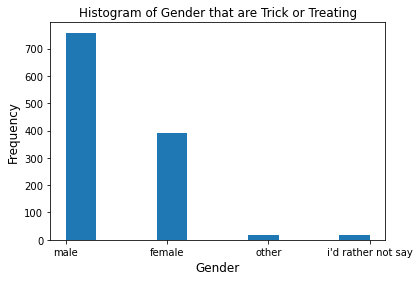

In [166]:
#Plot a histogram
plt.hist(df_sm_boing['gender']) #,bins=20) #Type of plot and bin setting
plt.xlabel('Gender',fontsize=12) #Label of X axis
plt.ylabel('Frequency',fontsize=12) #Label of Y axis
plt.title('Histogram of Gender that are Trick or Treating') #Title the histogram
plt.show() #Show plot

In [186]:
#Do some data grouping
data_group = df_sm_boing.groupby('gender')['trick_treating'].count()
#Preview the groups
data_group
                                                   

gender
female                392
i'd rather not say     16
male                  758
other                  17
Name: trick_treating, dtype: int64

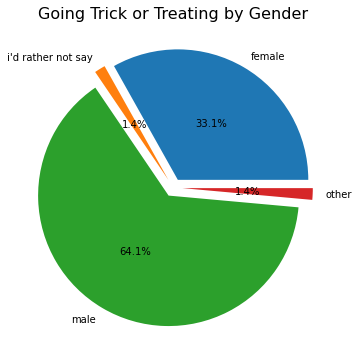

In [191]:
#Plot a pie chart
pie, ax = plt.subplots(figsize=[12,6]) #Size of the pie
labels = data_group.keys() #Labels
plt.pie(x=data_group, autopct='%.1f%%', explode=[0.07]*4, labels=labels, pctdistance=0.5) #Size and expanion of pie
plt.title('Going Trick or Treating by Gender', fontsize=16); #Title the pie chart


In [198]:
#Path to location and name of file. Load some term project data to perform grouping
loc = 'race_results_contractor.xlsx' 
#Read and load file into dataframe
df_contructor=pd.read_excel(loc, index_col=None, header=0)



In [199]:
#Preview the data
df_contructor.head()

,constructorResultsId,race,contructor,points
0,15641,Australian Grand Prix,Mercedes,22
1,15642,Australian Grand Prix,Red Bull,20
2,15643,Australian Grand Prix,McLaren,12
3,15644,Australian Grand Prix,Renault,7
4,15645,Australian Grand Prix,Force India,0


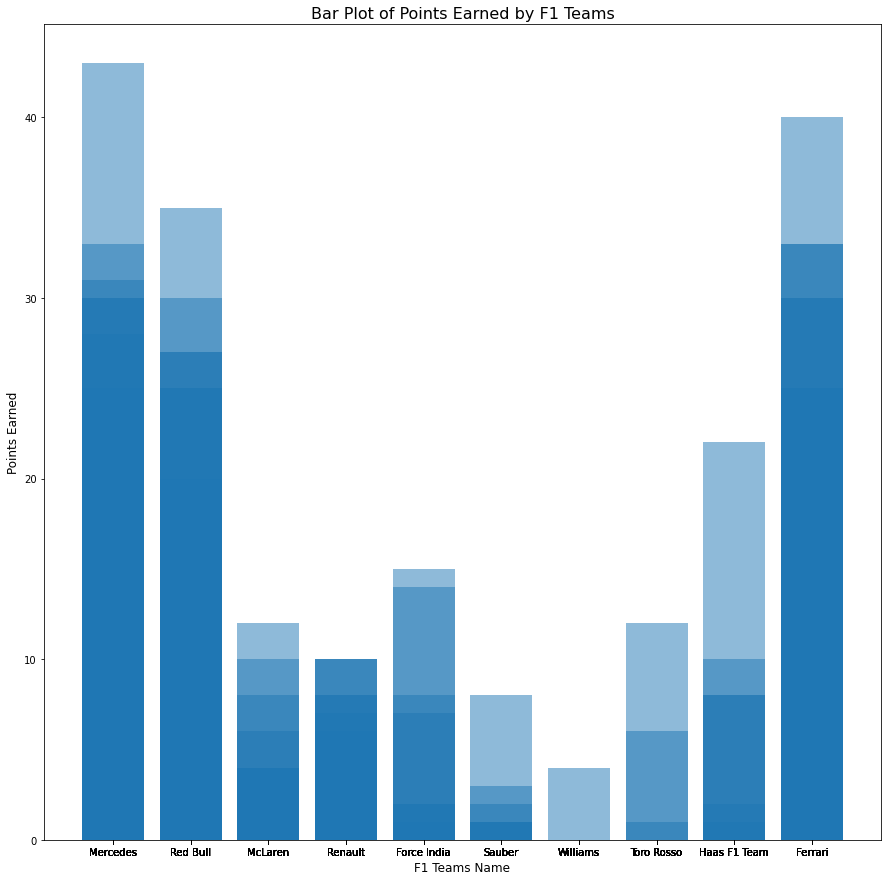

In [213]:
#Stack bar graph of Points by Contructor
#Set figure size (big)
f = plt.figure() 
f.set_figwidth(15) 
f.set_figheight(15) 
#Plot the data
plt.bar(df_contructor['contructor'],df_contructor['points'] , align='center', alpha=0.5) #Contructors to Points
plt.xticks(df_contructor['contructor']) #X will have Contructors
plt.ylabel('Points Earned', fontsize=12) #Lable of Y axis
plt.xlabel('F1 Teams Name', fontsize=12) #Lable of X axis
plt.title('Bar Plot of Points Earned by F1 Teams', fontsize=16) #Title the bar graph

plt.show() #Show the bar graph